# Class Meeting 20
### 2022-04-06

[]

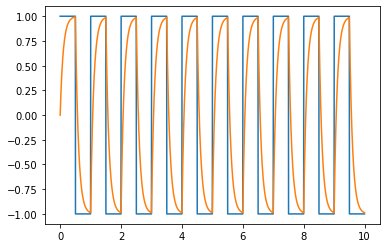

In [37]:
## Exercise 8.1 (Runge-Kutta)

import numpy as np
import matplotlib.pyplot as plt

h = 0.001
RC = 0.1 # 0.01, 1
time = np.arange(0, 10, h)


def v_input(a):
    return 1 if np.floor(2 * a) % 2 == 0 else -1


def f(a, b):
    return 1 / RC * (a - b)


vo_out = np.zeros(len(time))

for n in range(0, len(time) - 1):
    x1 = v_input(time[n])
    t1 = vo_out[n]

    k1 = h * f(x1, t1)
    k2 = h * f(x1 + k1 / 2, t1 + h / 2)
    k3 = h * f(x1 + k2 / 2, t1 + h / 2)
    k4 = h * f (x1 + k3, t1 + h)

    vo_out[n + 1] = vo_out[n] + (k1 + 2 * k2 + 2 * k3 + k4) / 6

plt.plot(time, [v_input(t) for t in time])
plt.plot(time, vo_out)
plt.plot()

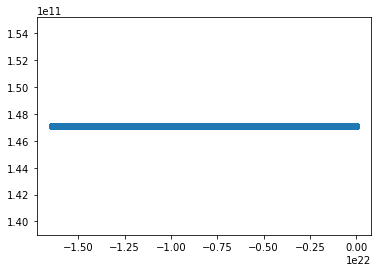

In [114]:
## Exercise 8.12 Orbit of the Earth

from astropy import units as u
from collections import namedtuple

# noinspection PyTypeChecker
Point = namedtuple('Point', ['x', 'y'])

h = 3600.0 * u.second
G = 6.6738E-11
M = 1.9891E30 * u.kg

orbit_time = np.arange(0, 8760)

# Position
r_out = {0 * u.s: Point(1.4710E11 * u.m, 0 * u.m)}

# Velocity
v_out = {0 * u.s: Point(0 * u.m / u.s, 3.0287E4 * u.m / u.s)}


def f_grav(r):
    distance = np.sqrt(r.x ** 2 + r.y ** 2)
    scalar = -G * M * (1 / distance ** 3)

    return Point(scalar * r.x, scalar * r.y)


v_out[h / 2] = Point((v_out[0 * u.s].x.value + h.value * f_grav(v_out[0 * u.s]).x.value) * u.m / u.s,
                     (v_out[0 * u.s].y.value + h.value * f_grav(v_out[0 * u.s]).y.value) * u.m / u.s)

for i in orbit_time:
    t = i * h

    grav = f_grav(r_out[t])

    x = r_out[t].x + (h.value * v_out[t + h / 2].x.value ) * u.m
    y = r_out[t].y + (h.value * v_out[t + h / 2].y.value) * u.m
    r_out[t + h] = Point(x, y)

    grav_h = f_grav(r_out[t + h])
    k_x = h * grav_h.x
    k_y = h * grav_h.y

    v_x = (v_out[t + h / 2].x.value + k_x.value / 2) * u.m / u.s
    v_y = (v_out[t + h / 2].y.value + k_y.value / 2) * u.m / u.s
    v_out[t + h] = Point(v_x, v_y)

    v_x_next = (v_out[t + h / 2].x.value + k_x.value) * u.m / u.s
    v_y_next = (v_out[t + h / 2].y.value + k_y.value) * u.m / u.s
    v_out[t + h * (3 / 2)] = Point(v_x_next, v_y_next)

x_pos = [r.x.value for r in r_out.values()]
y_pos = [r.y.value for r in r_out.values()]

plt.scatter(y_pos, x_pos)
plt.show()